In [4]:
import pandas as pd

df = pd.read_csv("weatherAUS.csv")

df.drop(columns=["Date", "Location"], inplace=True)

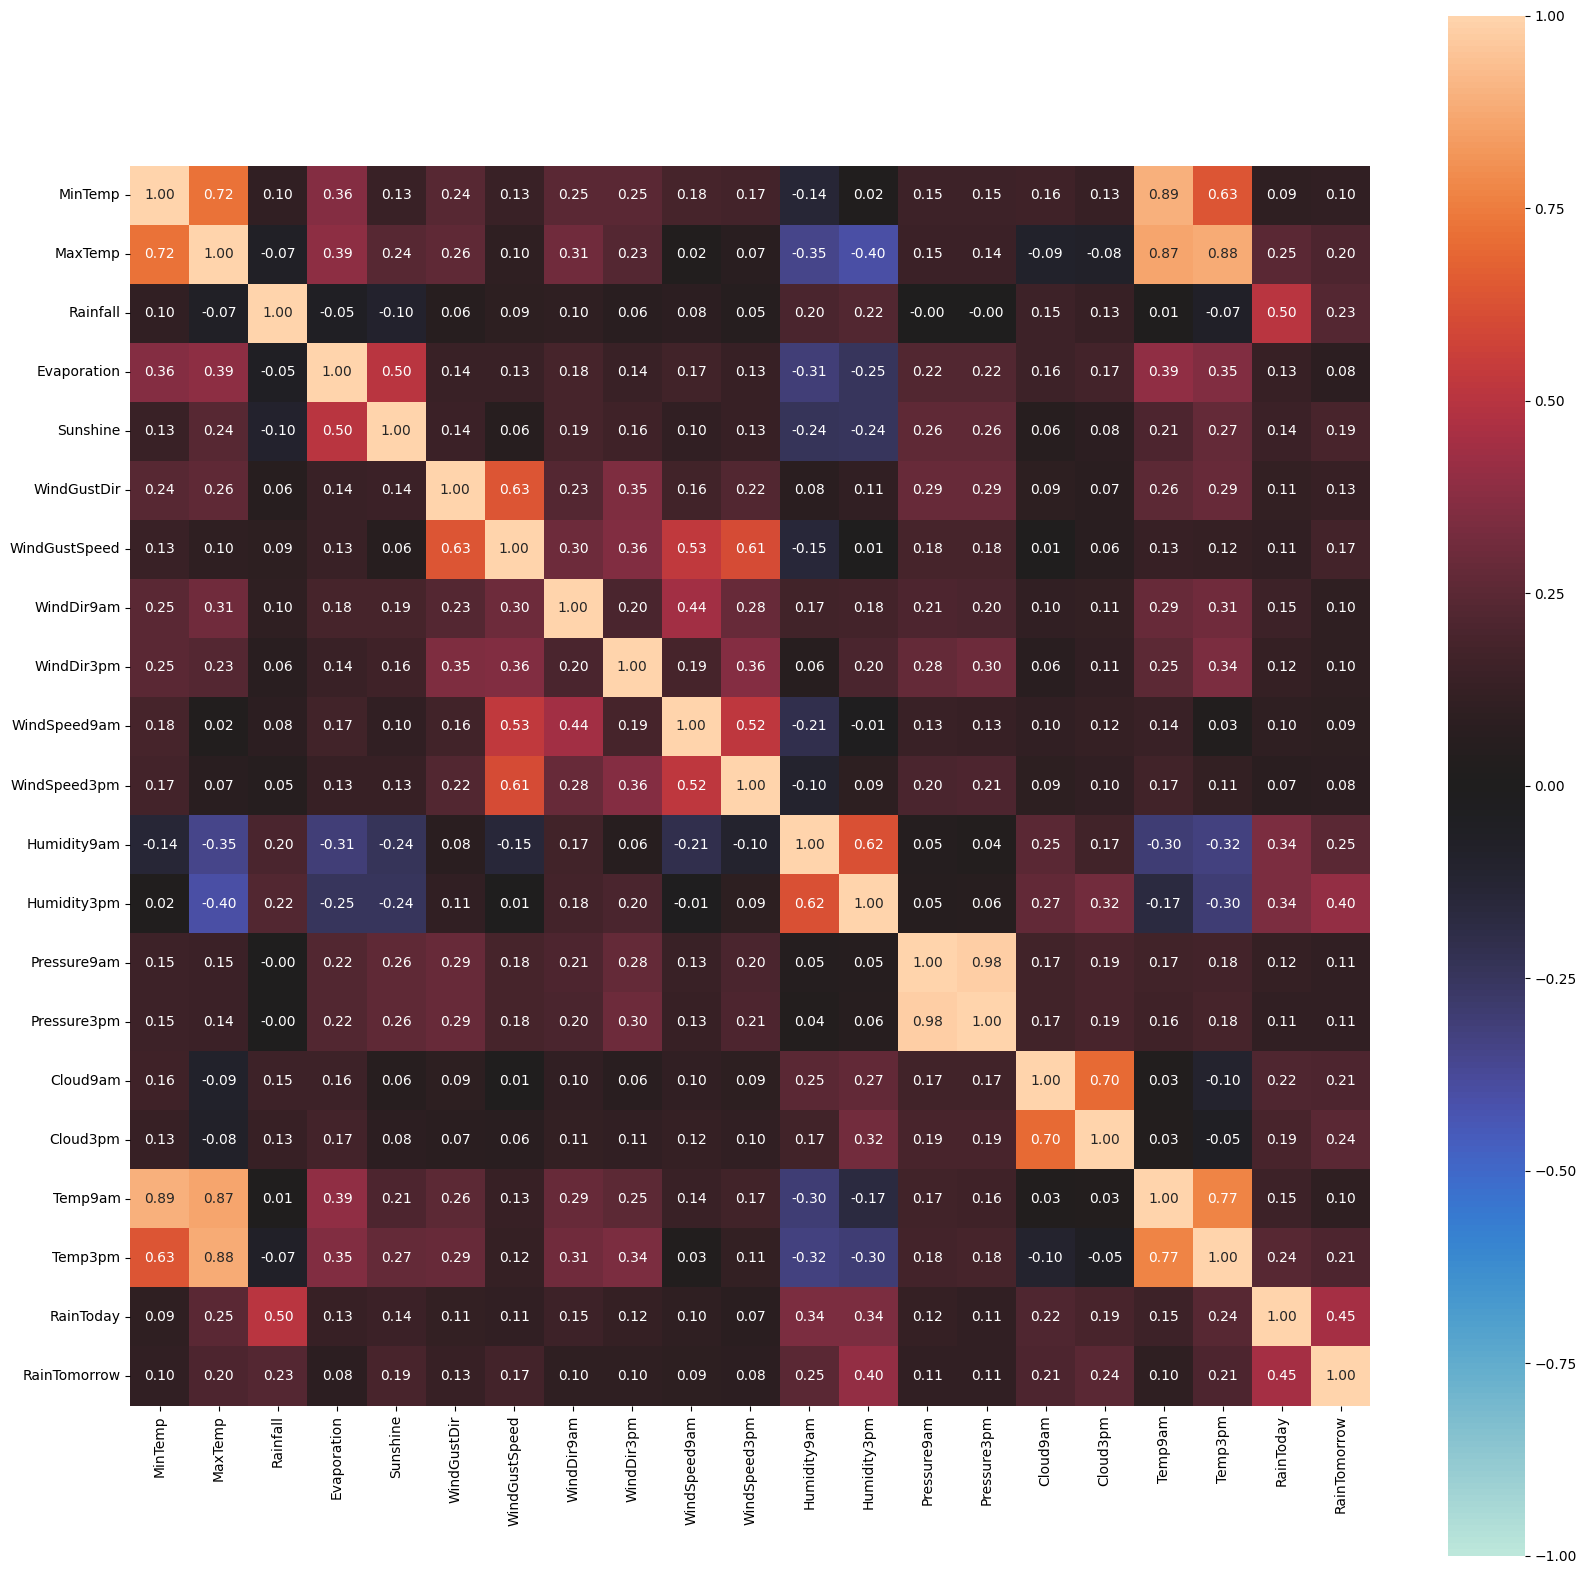

                MinTemp   MaxTemp  Rainfall  Evaporation  Sunshine  \
MinTemp        1.000000  0.722585  0.103082     0.359406  0.134241   
MaxTemp        0.722585  1.000000 -0.067070     0.386655  0.241775   
Rainfall       0.103082 -0.067070  1.000000    -0.053597 -0.096489   
Evaporation    0.359406  0.386655 -0.053597     1.000000  0.503813   
Sunshine       0.134241  0.241775 -0.096489     0.503813  1.000000   
WindGustDir    0.239162  0.261088  0.059749     0.139955  0.140649   
WindGustSpeed  0.133728  0.097230  0.092382     0.133444  0.056447   
WindDir9am     0.245085  0.310149  0.096820     0.183485  0.186355   
WindDir3pm     0.246921  0.233579  0.062707     0.136349  0.160063   
WindSpeed9am   0.180249  0.024391  0.084272     0.169372  0.102226   
WindSpeed3pm   0.174183  0.067438  0.051958     0.128140  0.125215   
Humidity9am   -0.137513 -0.348999  0.200255    -0.310267 -0.240276   
Humidity3pm    0.021648 -0.398467  0.224988    -0.248749 -0.244515   
Pressure9am    0.154

In [7]:
import matplotlib.pyplot as plt
from dython.nominal import associations

# Assumindo que 'df' é seu dataframe misto
# 'nominal_columns' avisa quais colunas devem ser tratadas como categóricas
# Se você já transformou em 0,1,2 mas quer tratar como categoria, liste elas aqui.
# Se deixar 'auto', ele tenta adivinhar.

assoc = associations(
    df, 
    nominal_columns='auto', # Ou liste: ['RainTomorrow', 'WindDir']
    numerical_columns=None,
    mark_columns=False,
    nom_nom_assoc='cramer', # V de Cramer para Cat vs Cat
    num_num_assoc='pearson', 
    plot=True,
    figsize=(20, 20)
)

# O gráfico já sai plotado (Heatmap)
plt.show()

# Para pegar a matriz de números:
matriz_corr = assoc['corr']
print(matriz_corr)

In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import mutual_info_score
from sklearn.tree import DecisionTreeClassifier


def compute_cuts(X, y, max_leaf_nodes=3):
    arvore = DecisionTreeClassifier(
        criterion="entropy",
        max_leaf_nodes=max_leaf_nodes,
        random_state=42,
    )
    arvore.fit(X, y)
    thresholds = arvore.tree_.threshold  # type: ignore
    thresholds = thresholds[thresholds != -2]
    thresholds = np.sort(thresholds)
    return thresholds


def mutual_information(col, target):
    """
    Calcula MI entre uma variável e o alvo RainTomorrow.
    Detecta automaticamente se é numérica ou categórica.
    """
    col = col.dropna()
    target = target.loc[col.index]  # alinhar

    # categórica → usar diretamente
    if col.dtype == "object" or col.dtype.name == "category":
        return mutual_info_score(col, target)

    # numérica → discretizar
    try:
        thresholds = compute_cuts(col.to_frame(), target, max_leaf_nodes=3)
        col_bin = pd.cut(col, bins=[-np.inf] + thresholds.tolist() + [np.inf])
        return mutual_info_score(col_bin, target)
    except:
        return None

In [14]:
TARGET = "Cloud3pm"

vars = df.columns.to_list()
vars.remove(TARGET)
for var in vars:
    df_clean = df.dropna(subset=[var, TARGET])
    mi = mutual_information(df_clean[var], df_clean[TARGET])
    print(f"MI({var}, {TARGET}) = {mi}")

MI(MinTemp, Cloud3pm) = 0.006337775671749351
MI(MaxTemp, Cloud3pm) = 0.04199896197625308
MI(Rainfall, Cloud3pm) = 0.0581713993329618
MI(Evaporation, Cloud3pm) = 0.02269552861433842
MI(Sunshine, Cloud3pm) = 0.30309518225771365
MI(WindGustDir, Cloud3pm) = 0.015129410827129734
MI(WindGustSpeed, Cloud3pm) = 0.00825915261817342
MI(WindDir9am, Cloud3pm) = 0.015113443466656135
MI(WindDir3pm, Cloud3pm) = 0.0101919143853724
MI(WindSpeed9am, Cloud3pm) = 0.002414629570165275
MI(WindSpeed3pm, Cloud3pm) = 0.0026698053245033876
MI(Humidity9am, Cloud3pm) = 0.06870697056219854
MI(Humidity3pm, Cloud3pm) = 0.15535435438866813
MI(Pressure9am, Cloud3pm) = 0.016099291102192284
MI(Pressure3pm, Cloud3pm) = 0.009119946530055743
MI(Cloud9am, Cloud3pm) = 0.20419189462799275
MI(Temp9am, Cloud3pm) = 0.012506388637934105
MI(Temp3pm, Cloud3pm) = 0.05506973763430861
MI(RainToday, Cloud3pm) = 0.043558265983830474
MI(RainTomorrow, Cloud3pm) = 0.08585679804922414


In [6]:
for var in df.columns.to_list()[:-1]: # type: ignore
    df_clean = df.dropna(subset=[var, "RainTomorrow"])
    mi = mutual_information(df_clean[var], df_clean["RainTomorrow"].map({"No": 0, "Yes": 1}))
    print(f"MI({var}, RainTomorrow) = {mi}")
    

MI(MinTemp, RainTomorrow) = 0.005006789081469981
MI(MaxTemp, RainTomorrow) = 0.011337777523167947
MI(Rainfall, RainTomorrow) = 0.051819970354012826
MI(Evaporation, RainTomorrow) = 0.008593672345237002
MI(Sunshine, RainTomorrow) = 0.09133683488042786
MI(WindGustDir, RainTomorrow) = 0.005772995856171227
MI(WindGustSpeed, RainTomorrow) = 0.024357117387516863
MI(WindDir9am, RainTomorrow) = 0.00847874774435934
MI(WindDir3pm, RainTomorrow) = 0.004598600026067795
MI(WindSpeed9am, RainTomorrow) = 0.0033545027610665384
MI(WindSpeed3pm, RainTomorrow) = 0.00427871084237115
MI(Humidity9am, RainTomorrow) = 0.032680687924487584
MI(Humidity3pm, RainTomorrow) = 0.09675113759927492
MI(Pressure9am, RainTomorrow) = 0.02616002492586922
MI(Pressure3pm, RainTomorrow) = 0.021652974762656776
MI(Cloud9am, RainTomorrow) = 0.04904827033704484
MI(Cloud3pm, RainTomorrow) = 0.0715978150823128
MI(Temp9am, RainTomorrow) = 0.0010911972893474856
MI(Temp3pm, RainTomorrow) = 0.016531225260641103
MI(RainToday, RainTomorro

In [ ]:
edges = [
    # Primários
    ("Humidity3pm", "RainTomorrow"),
    ("Sunshine", "RainTomorrow"),
    ("Cloud3pm", "RainTomorrow"),
    ("Rainfall", "RainTomorrow"),
    ("Pressure9am", "RainTomorrow"),
    ("WindGustSpeed", "RainTomorrow"),

    # Secundários
    ("Humidity9am", "Humidity3pm"),
    ("Cloud9am", "Cloud3pm"),
    ("Pressure9am", "WindGustSpeed"),
    ("WindGustDir", "WindGustSpeed"),
]

### Feita a análise, partiu implementação

In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split

df = pd.read_csv("weatherAUS.csv")


vars_to_drop = df.columns.difference(
    [
        "Humidity3pm",
        "Sunshine",
        "Cloud3pm",
        "Rainfall",
        "Pressure9am",
        "WindGustSpeed",
        "Humidity9am",
        "Cloud9am",
        "WindGustDir",
        "RainTomorrow",
    ]
)
df.drop(columns=vars_to_drop, inplace=True)
total_antes = len(df)
df.dropna(subset=["RainTomorrow", "Humidity3pm", "Rainfall", "Pressure9am", "WindGustSpeed", "Humidity9am", "WindGustDir"], inplace=True)
total_depois = len(df)
print(f"Total antes da remoção de NaNs: {total_antes}")
print(f"Total depois da remoção de NaNs: {total_depois}")
df["RainTomorrow"] = df["RainTomorrow"].map({"No": 0, "Yes": 1}).astype("category")

train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

Total antes da remoção de NaNs: 145460
Total depois da remoção de NaNs: 119788


In [20]:
for var in df.columns.to_list()[:-1]:
    if train_df[var].dtype != "object":

        # 1. Calcular cortes somente no TRAIN
        df_clean = train_df.dropna(subset=[var, "RainTomorrow"])
        thresholds = compute_cuts(
            df_clean[var].to_frame(), df_clean["RainTomorrow"], max_leaf_nodes=3
        )
        print(f"Thresholds for {var}: {thresholds}")

        # 2. Discretizar train e test
        train_bins = pd.cut(
            train_df[var], bins=[-np.inf] + thresholds.tolist() + [np.inf], labels=False
        )

        test_bins = pd.cut(
            test_df[var], bins=[-np.inf] + thresholds.tolist() + [np.inf], labels=False
        )

        # 3. Converter PARA CATEGORY (não str ainda!)
        train_df[var] = train_bins.astype("category")
        test_df[var] = test_bins.astype("category")

        # 4. Adicionar categoria "Missing" SOMENTE para variáveis problemáticas
        if var in ["Cloud3pm", "Cloud9am", "Sunshine"]:
            train_df[var] = train_df[var].cat.add_categories(["Missing"])
            test_df[var] = test_df[var].cat.add_categories(["Missing"])

            # preencher missing com esta categoria
            train_df.loc[train_df[var].isna(), var] = "Missing"
            test_df.loc[test_df[var].isna(), var] = "Missing"

        # 5. Agora sim, converter para string, se quiser
        train_df[var] = train_df[var].astype(str)
        test_df[var] = test_df[var].astype(str)

Thresholds for Rainfall: [0.35000001 5.95000005]
Thresholds for Sunshine: [7.54999995 9.55000019]
Thresholds for WindGustSpeed: [47. 58.]
Thresholds for Humidity9am: [59.5 73.5]
Thresholds for Humidity3pm: [66.5 81.5]
Thresholds for Pressure9am: [1008.8500061  1014.54998779]
Thresholds for Cloud9am: [4.5 7.5]
Thresholds for Cloud3pm: [5.5 7.5]


In [21]:
from pgmpy.models import DiscreteBayesianNetwork
from pgmpy.estimators import MaximumLikelihoodEstimator

edges = [
    # Primários
    ("Humidity3pm", "RainTomorrow"),
    ("Sunshine", "RainTomorrow"),
    ("Cloud3pm", "RainTomorrow"),
    ("Rainfall", "RainTomorrow"),
    ("Pressure9am", "RainTomorrow"),
    ("WindGustSpeed", "RainTomorrow"),
    # Secundários
    ("Humidity9am", "Humidity3pm"),
    ("Cloud9am", "Cloud3pm"),
    ("Pressure9am", "WindGustSpeed"),
    ("WindGustDir", "WindGustSpeed"),
]

# 1. Definir a Estrutura (Topologia)
# Você lista as arestas: (Causa -> Efeito)
model = DiscreteBayesianNetwork(edges)

# 3. "Aprender" as CPTs (Tabelas de Probabilidade Condicional)
# Aqui o pgmpy vai contar as frequências no seu DF discretizado
# e calcular P(Chuva | Pressão, Umidade, Vento)
model.fit(train_df, estimator=MaximumLikelihoodEstimator)

# 2. Verificar se o modelo é válido (sem ciclos)
# Ex: A->B->A não é permitido
assert model.check_model()

# 4. Visualizar uma das tabelas (Ex: Probabilidade de Chuva)
print("CPT da variável RainTomorrow:")
df_cpd = model.get_cpds("RainTomorrow").to_dataframe() # type: ignore
df_cpd

INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'Rainfall': 'C', 'Sunshine': 'C', 'WindGustDir': 'C', 'WindGustSpeed': 'C', 'Humidity9am': 'C', 'Humidity3pm': 'C', 'Pressure9am': 'C', 'Cloud9am': 'C', 'Cloud3pm': 'C', 'RainTomorrow': 'C'}


CPT da variável RainTomorrow:


RainTomorrow                                                             0  \
Cloud3pm Humidity3pm Pressure9am Rainfall Sunshine WindGustSpeed             
0.0      0           0           0        0.0      0              0.738095   
                                                   1              0.551724   
                                                   2              0.508772   
                                          1.0      0              0.787234   
                                                   1              0.820513   
...                                                                    ...   
Missing  2           2           2        2.0      1              0.500000   
                                                   2              0.500000   
                                          Missing  0              0.193548   
                                                   1              0.076923   
                                                   2              0.037037   

RainTomorrow                                                             1  
Cloud3pm Humidity3pm Pressure9am Rainfall Sunshine WindGustSpeed            
0.0      0           0           0        0.0      0              0.261905  
                                                   1              0.448276  
                                                   2              0.491228  
                                          1.0      0              0.212766  
                                                   1              0.179487  
...                                                                    ...  
Missing  2           2           2        2.0      1              0.500000  
                                                   2              0.500000  
                                          Missing  0              0.806452  
                                                   1              0.923077  
                                                   2              0.962963  

[1296 rows x 2 columns]

### Previsoes

In [22]:
x_test = test_df.drop(columns=["RainTomorrow"])
y_test = test_df["RainTomorrow"]

AUC Score: 0.8442


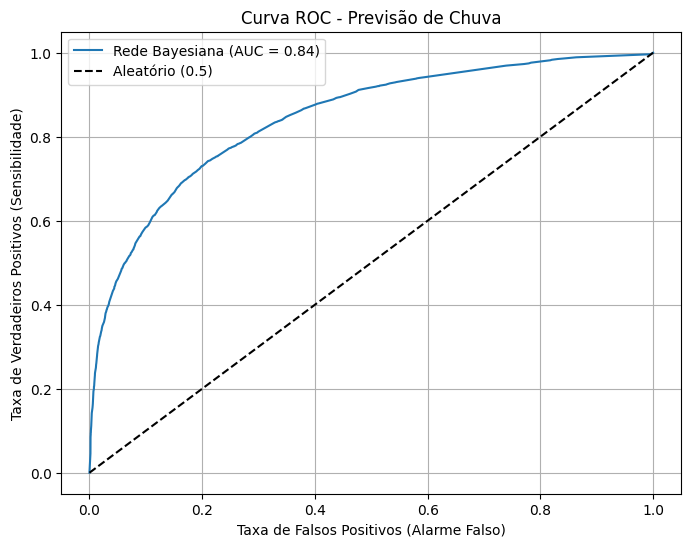

In [23]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# 1. Obter as probabilidades da classe positiva (1 = Chove)
# O predict_probability retorna um DF. Queremos a coluna correspondente ao '1'.
y_probs_df = model.predict_probability(x_test)

# Assumindo que a coluna do '1' é a segunda coluna (índice 1)
# Verifique se a ordem das colunas é [0, 1] no seu output
probs_chuva = y_probs_df.iloc[:, 1]

# 2. Calcular a Curva ROC
# fpr: False Positive Rate (Taxa de Alarme Falso)
# tpr: True Positive Rate (Taxa de Verdadeiro Positivo / Recall)
# thresholds: Os pontos de corte testados
fpr, tpr, thresholds = roc_curve(y_test, probs_chuva)

# 3. Calcular a AUC (Área Sob a Curva) - Sua "Nota Final"
auc_score = roc_auc_score(y_test, probs_chuva)
print(f"AUC Score: {auc_score:.4f}")

# 4. Plotar
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Rede Bayesiana (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Aleatório (0.5)') # Linha de base
plt.xlabel('Taxa de Falsos Positivos (Alarme Falso)')
plt.ylabel('Taxa de Verdadeiros Positivos (Sensibilidade)')
plt.title('Curva ROC - Previsão de Chuva')
plt.legend()
plt.grid()
plt.show()

In [24]:
import numpy as np
from sklearn.metrics import classification_report

# Calcula o J statistic para cada ponto da curva
J = tpr - fpr
ix = np.argmax(J) # Índice do maior J
best_thresh = thresholds[ix]

print(f"Melhor Threshold (Youden): {best_thresh}")
print(f"Sensibilidade neste ponto: {tpr[ix]}")
print(f"Taxa de Alarme Falso neste ponto: {fpr[ix]}")

y_pred_otimizado = (probs_chuva >= best_thresh).astype(int)
print(classification_report(y_test, y_pred_otimizado))

Melhor Threshold (Youden): 0.2169811320754717
Sensibilidade neste ponto: 0.7417446077495705
Taxa de Alarme Falso neste ponto: 0.2100005342165714
              precision    recall  f1-score   support

           0       0.92      0.79      0.85     18719
           1       0.50      0.74      0.60      5239

    accuracy                           0.78     23958
   macro avg       0.71      0.77      0.72     23958
weighted avg       0.82      0.78      0.79     23958

